<a href="https://colab.research.google.com/github/KoheiMinoda/Ocean_Engineering/blob/main/chapter3_ex.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import math

def wnumber(X):
    if X < 0.0:
        raise ValueError('error at wnumber')

    c = [1.0, -0.33333372, -0.01109668, 0.01726435, 0.01325580, -0.00116594, 0.00829006, -0.01252603, 0.00404923]
    b = [0.000000122, 0.073250017, -0.009899981, 0.002640863, -0.000829239, -0.000176411]

    if X <= 2.0:
        a = 0.5 * X
        p = 1.0
        _sum = c[0]

        for i in range(1, 9):
            p *= a
            _sum += c[i] * p

        Wk0 = math.sqrt(X) / _sum
    else:
        a = 0.5 * X * math.exp(4.0 - 2.0 * X)
        p = 1.0
        _sum = b[0]

        for i in range(1, 6):
            p *= a
            _sum += b[i] * p

        Wk0 = X + _sum

    return Wk0

# Example usage:
# X = 1.5  # Replace with the desired value of X
# result = wnumber(X)
# print(f'Wk0({X}) = {result}')


In [ ]:
import csv

# Open a CSV file for writing
with open('Kh_vs_kh.csv', mode='w', newline='') as file:
    writer = csv.writer(file)

    # Write the header row
    writer.writerow(['Kh', 'kh'])

    # Loop from 1 to 500
    for i in range(1, 501):
        x = i / 100.0
        wk0 = wnumber(x)  # Call your wnumber function here

        # Write the values to the CSV file
        writer.writerow([x, wk0])


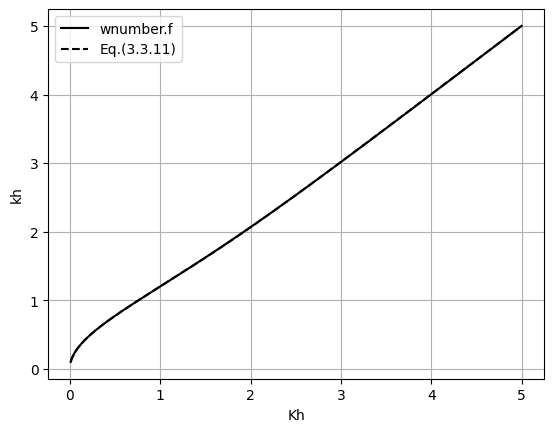

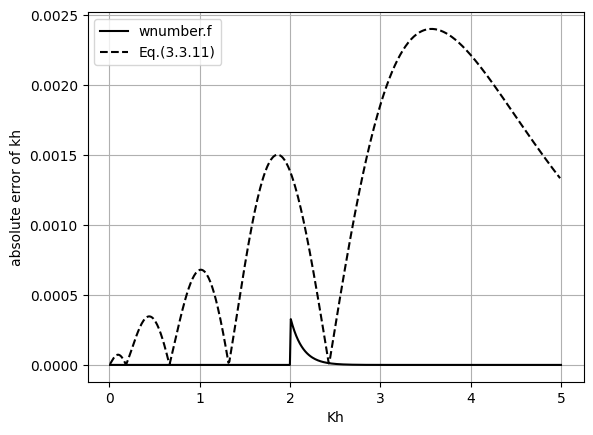

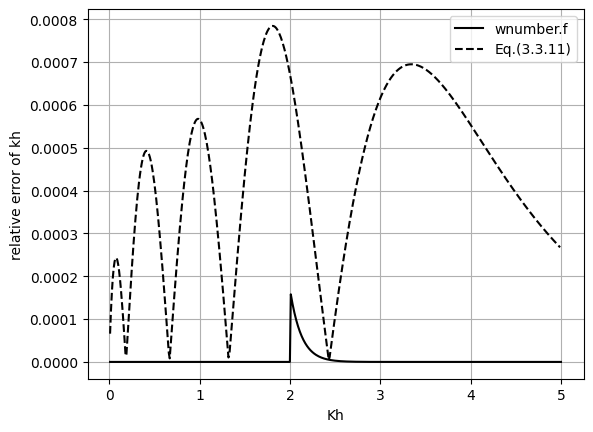

In [ ]:
# ex3-1-2.py
#
# python3 ex3-1-2.py
#
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# loading data calculated by wnumber.f
xy=pd.read_csv("Kh_vs_kh.csv")
Kh=np.array(xy['Kh'])
kh=np.array(xy['kh'])

# calculate kh using approximate formula (3.3.11)
D=np.arange(0.01,5.0,0.01)
x=np.sqrt(D*(D+1./(1.+D*(0.6522+D*(0.4622+D**2*(0.0864+0.0675*D))))))

# plot graph of Kh vs kh
fig1 = plt.figure()
plt.plot(Kh,kh,ls='-',c='k',label='wnumber.f')
plt.plot(D,x,ls='--',c='k',label='Eq.(3.3.11)')
plt.xlabel('Kh')
plt.ylabel('kh')
plt.grid()
plt.legend()
plt.show()
fig1.savefig("Fig3-4.pdf")

# plot absolute error
fig2 = plt.figure()
Kh_exact=kh*np.tanh(kh)
Kh_error=abs(Kh-Kh_exact)
dKh_dkh=np.tanh(kh)+kh*(1./np.cosh(kh))**2
kh_error=Kh_error/dKh_dkh

D_exact=x*np.tanh(x)
D_error=abs(D-D_exact)
dD_dx=np.tanh(x)+x*(1./np.cosh(x))**2
x_error=D_error/dD_dx

plt.plot(Kh,kh_error,ls='-',c='k',label='wnumber.f')
plt.plot(D,x_error,ls='--',c='k',label='Eq.(3.3.11)')
plt.xlabel('Kh')
plt.ylabel('absolute error of kh')
plt.grid()
plt.legend()
plt.show()
fig2.savefig("Fig3-5.pdf")

# plot relative error
fig3 = plt.figure()
kh_rerror=kh_error/kh
x_rerror=x_error/x

plt.plot(Kh,kh_rerror,ls='-',c='k',label='wnumber.f')
plt.plot(D,x_rerror,ls='--',c='k',label='Eq.(3.3.11)')
plt.xlabel('Kh')
plt.ylabel('relative error of kh')
plt.grid()
plt.legend()
plt.show()
fig3.savefig("Fig3-6.pdf")